In [2]:
import torch
import models.modelGs
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
import cv2
from header import *
from torchvision.transforms import Normalize, ToTensor


In [3]:
use_cuda = False
def img2batch(img):
    img = ToTensor()(img)
    img = Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(img).numpy()
    return torch.FloatTensor((img, ))
def batch2img(batch):
    img = np.transpose(batch[0].cpu().numpy(), (1, 2, 0))
    img = (img*0.5 + 0.5)*255//1
    return np.uint8(img)
def viewFAKE(netG, x):
    netG.eval()
    x = img2batch(x).cuda() if use_cuda else img2batch(x)
    Gxz = netG(x)
    img = batch2img(Gxz.detach())
    print(img.shape)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
#    print(img)
    return img


In [4]:
netG = models.modelGs.G_Unet({
    'in_channels': 3,
    'out_channels': 3,
    'ngf': 64
}).to(torch.device("cpu"))

In [5]:
mop = 'saved_models/checkpoint.pth.tar'
state = torch.load(mop)
netG.load_state_dict(state['netG'])
print("(epoch {})".format(state['epoch']+1))

(epoch 200)


(256, 256, 3)


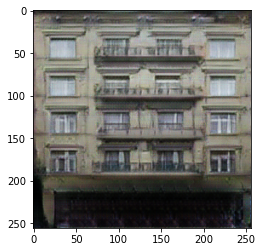

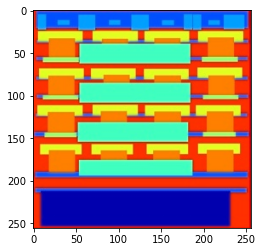

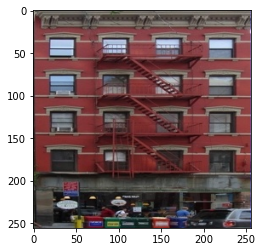

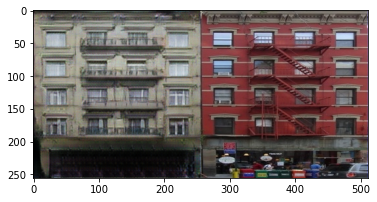

True

In [8]:
imgp = 'datasets/facades/val/46.jpg'
img = cv2.imread(imgp)[:,256:,:]
a = viewFAKE(netG, img)
b = cv2.imread(imgp)[:,:256,:]
plt.imshow(img[:,::-1,:])
plt.show()
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
plt.show()
img = np.concatenate((a, b), axis = 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
cv2.imwrite('result.jpg', img)